In [12]:
import requests
import json
import pandas as pd
import pandas
url1 = requests.get('https://api.census.gov/data/2018/abscs?get=NAME,NAICS2017_LABEL,SEX,EMP,PAYANN&key=0e052a31f501c1a0f026dacb2eb0f65d2e8a0fc5')
url2 = requests.get('https://api.census.gov/data/2018/abscs?get=NAME,NAICS2017_LABEL,RACE_GROUP,EMP,PAYANN&key=0e052a31f501c1a0f026dacb2eb0f65d2e8a0fc5')
#url2 = requests.get('https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&key=0e052a31f501c1a0f026dacb2eb0f65d2e8a0fc5')
url3 = requests.get('https://api.census.gov/data/2018/abscs?get=NAME,YIBSZFI,EMP,PAYANN&key=0e052a31f501c1a0f026dacb2eb0f65d2e8a0fc5')
#YIBSZFI
print(url1)
test1 = url1.json()
test1.remove(test1[0])
test2 = url2.json()
test2.remove(test2[0])
test3 = url3.json()
test3.remove(test3[0])

<Response [200]>


In [4]:
print(len(test2))
import pandas

business_summary = pandas.DataFrame(test1, columns = ['NAME','NAICS2017_LABEL', 'SEX','EMP', 'PAYANN'])

business_summary_ethnicity = pandas.DataFrame(test2, columns = ['NAME','NAICS2017_LABEL','RACE_GROUP','EMP', 'PAYANN'])

business_summary_years = pandas.DataFrame(test3, columns = ['NAME','YIBSZFI','EMP', 'PAYANN'])
#index1 = business_summary[business_summary['NAME'] == 'United States'].index

#business_summary.drop(index1, inplace = True)

#business_summary.reset_index(inplace = True)

#business_summary.drop(index=range(205,1732), inplace = True)

business_summary_minny = business_summary[business_summary.NAME == 'Minneapolis-St. Paul-Bloomington, MN-WI Metro Area']

business_summary_minny_ethnicity = business_summary_ethnicity[business_summary_ethnicity.NAME == 'Minneapolis-St. Paul-Bloomington, MN-WI Metro Area']

business_summary_minny_years = business_summary_years[business_summary_years.NAME == 'Minneapolis-St. Paul-Bloomington, MN-WI Metro Area']

3615


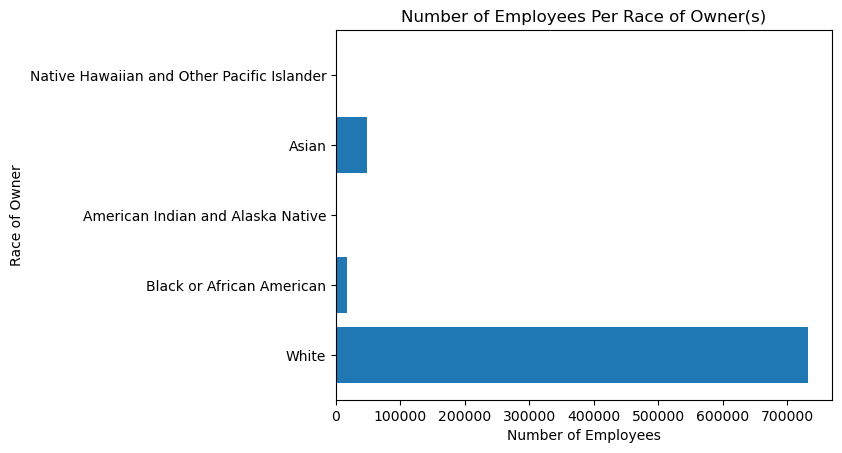

In [8]:
import matplotlib.pyplot as plt

business_summary_minny_ethnicity['RACE_GROUP'].replace('30', 'White', inplace = True)
business_summary_minny_ethnicity['RACE_GROUP'].replace('40', 'Black or African American', inplace = True)
business_summary_minny_ethnicity['RACE_GROUP'].replace('50', 'American Indian and Alaska Native', inplace = True)
business_summary_minny_ethnicity['RACE_GROUP'].replace('70', 'Native Hawaiian and Other Pacific Islander', inplace = True)
business_summary_minny_ethnicity['RACE_GROUP'].replace('60', 'Asian', inplace = True)
business_summary_minny_ethnicity['RACE_GROUP'].replace('90', 'Minority', inplace = True)
business_summary_minny_ethnicity =  business_summary_minny_ethnicity[business_summary_minny_ethnicity.RACE_GROUP != '00']
business_summary_minny_ethnicity =  business_summary_minny_ethnicity[business_summary_minny_ethnicity.RACE_GROUP != 'Minority']
business_summary_minny_ethnicity =  business_summary_minny_ethnicity[business_summary_minny_ethnicity.RACE_GROUP != '91']
business_summary_minny_ethnicity =  business_summary_minny_ethnicity[business_summary_minny_ethnicity.RACE_GROUP != '92']
business_summary_minny_ethnicity.head(16)

plt.rcdefaults()
fig, ax = plt.subplots()
business_summary_minny_ethnicity['EMP'] = business_summary_minny_ethnicity['EMP'].astype(int)

x_pos = [i for i, _ in enumerate(business_summary_minny_ethnicity['RACE_GROUP'])]

ax.barh(x_pos,business_summary_minny_ethnicity['EMP'] , align='center')
ax.set_yticks(x_pos)





  # labels read top-to-bottom
ax.set_yticklabels(business_summary_minny_ethnicity['RACE_GROUP'])
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Race of Owner')
ax.set_title('Number of Employees Per Race of Owner(s)')
plt.show()


[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Annual payroll in USD in millions'),
 Text(0.5, 1.0, 'Annual Payroll vs Owner(s) Gender(s)')]

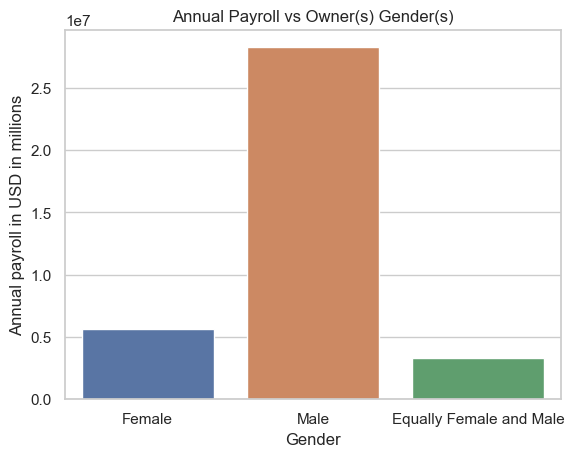

In [9]:
#chart 2

import seaborn as sns
#fig = plt.figure()
business_summary_minny =  business_summary_minny[business_summary_minny.SEX != '001']
business_summary_minny['PAYANN'] = business_summary_minny['PAYANN'].astype(int)

business_summary_minny['SEX'].replace('002', 'Female', inplace = True)
business_summary_minny['SEX'].replace('003', 'Male', inplace = True)
business_summary_minny['SEX'].replace('004', 'Equally Female and Male', inplace = True)


plt.style.use('ggplot')


x_pos = [i for i, _ in enumerate(business_summary_minny['SEX'])]

#print(x_pos)

#ax.bar(business_summary_minny['SEX'],business_summary_minny['EMP'])
#plt.title("Annual Payroll vs Owner(s) Gender(s)")
#plt.ylabel('Annual payroll in USD')
#plt.xlabel('Gender(s) of Business Owners')
#plt.bar(x_pos,business_summary_minny['PAYANN'], color ='blue')

#plt.xticks(x_pos,business_summary_minny['SEX'])

#plt.show()


sns.set_theme(style="whitegrid")
ax = sns.barplot(x="SEX", y="PAYANN", data= business_summary_minny)
ax.set(xlabel="Gender", ylabel = "Annual payroll in USD in millions", title = 'Annual Payroll vs Owner(s) Gender(s)')



In [10]:
business_summary_minny_years['YIBSZFI'].replace('311', 'Less Than 2', inplace = True)
business_summary_minny_years['YIBSZFI'].replace('318', '2 to 3', inplace = True)
business_summary_minny_years['YIBSZFI'].replace('319', '4 to 5', inplace = True)
business_summary_minny_years['YIBSZFI'].replace('321', '6 to 10', inplace = True)
business_summary_minny_years['YIBSZFI'].replace('322', '11 to 15', inplace = True)
business_summary_minny_years['YIBSZFI'].replace('323', '16 and beyond', inplace = True)
business_summary_minny_years =  business_summary_minny_years[business_summary_minny_years.YIBSZFI != '001']
business_summary_minny_years.head(7)

C:\Users\tyler\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,NAME,YIBSZFI,EMP,PAYANN
1975,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",Less Than 2,40849,1608744
1976,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",2 to 3,50418,1757151
1977,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",4 to 5,58516,2305422
1978,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",6 to 10,109794,4361600
1979,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",11 to 15,97484,3669697
1980,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",16 and beyond,1443401,92230156


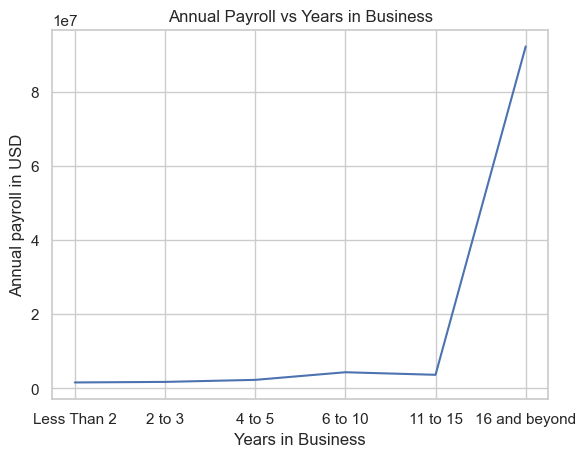

In [11]:
#chart 3
business_summary_minny_years['PAYANN'] = business_summary_minny_years['PAYANN'].astype(int)
plt.plot(business_summary_minny_years['YIBSZFI'], business_summary_minny_years['PAYANN'])
plt.title('Annual Payroll vs Years in Business')
plt.xlabel('Years in Business')
plt.ylabel('Annual payroll in USD')
plt.show()